In [1]:
# | default_exp charts

In [2]:
# | export
# | hide
import altair as alt
from altair import Chart

alt = alt
Chart = Chart
from torch_snippets.loader import *

In [3]:
from torch_snippets.loader import *
from sklearn.datasets import make_moons

np.random.seed(10)
x, y = make_moons(1000, noise=0.1)
df = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})

Chart(df).mark_circle().encode(x="x1:Q", y="x2:Q", color="y:N").interactive()

alt.Chart(...)

Refer to [altair-viz.github.io](altair-viz.github.io) for more awesome charts.   
`torch-snippets` exposes a confusion matrix function `CM` as an example

In [4]:
# | export
# | hide
def confusion_matrix(df=None, truth=None, pred=None, mapping=None, save_to=None):
    """
    Generate a confusion matrix chart based on the given DataFrame or truth/prediction arrays.

    Parameters:
    - df (DataFrame, optional): The input DataFrame containing the truth and prediction columns. If not provided, the truth and prediction arrays must be provided separately.
    - truth (array-like, optional): The array-like object containing the true labels.
    - pred (array-like, optional): The array-like object containing the predicted labels.
    - mapping (dict, optional): A dictionary mapping the labels to their corresponding names.
    - save_to (str, optional): The file path to save the chart in HTML format.

    Returns:
    - chart (altair.Chart): The confusion matrix chart.

    Note:
    - If `df` is not provided, `truth` and `pred` must be provided separately.
    - If `save_to` is provided, the chart will be saved at the specified file path in HTML format.
    - If `mapping` is provided, the labels in the chart will be replaced with their corresponding names.

    Example usage:
    ```
    # Generate confusion matrix from DataFrame
    confusion_matrix(df=my_df, mapping=my_mapping, save_to="confusion_matrix.html")

    # Generate confusion matrix from separate truth and prediction arrays
    confusion_matrix(truth=my_truth, pred=my_pred, mapping=my_mapping)
    ```
    """
    if df is None:
        df = pd.DataFrame({"truth": truth, "pred": pred})
        truth = "truth"
        pred = "pred"
    DF = df[[truth, pred]]

    try:
        from sklearn.metrics import classification_report

        print(classification_report(DF[truth], DF[pred]))
    except:
        logger.info("Skipping Report")
    df = DF.pivot_table(index=truth, columns=pred, aggfunc=len).reset_index()
    df = df.melt(id_vars=truth, var_name=pred, value_name="value")
    sz = 450 if len(DF[truth].unique()) > 4 else 250

    base = alt.Chart(df, height=sz, width=sz)
    hm = base.mark_rect().encode(
        x=f"{pred}:O",
        y=f"{truth}:O",
        color=alt.Color("value:Q", scale=alt.Scale(scheme="lightorange"), legend=None),
    )

    tx = base.mark_text(baseline="middle").encode(
        x=f"{pred}:O",
        y=f"{truth}:O",
        text="value:Q",
        color=alt.condition(
            alt.datum.value > 0,
            alt.value("black"),
            alt.value("rgba(0, 0, 0, 0)"),  # Transparent color for value 0
        ),
    )

    if save_to is not None:
        assert str(save_to).endswith("html"), "Can only save in html format"
        (hm + tx).save(save_to, format="html")
        Info(f"Saved chart at {save_to}")
    else:
        return hm + tx


CM = confusion_matrix

### Method 1

In [5]:
n = 10
a = "qwertyuiopasdfghjklzxcvbnm"
truth = np.random.randint(4, size=1000000)
pred = np.random.randint(4, size=1000000)
show(CM(truth=truth, pred=pred, mapping={i: a for i, a in enumerate(a)}))
# mapping is optional

              precision    recall  f1-score   support

           0       0.25      0.25      0.25    250150
           1       0.25      0.25      0.25    250245
           2       0.25      0.25      0.25    249836
           3       0.25      0.25      0.25    249769

    accuracy                           0.25   1000000
   macro avg       0.25      0.25      0.25   1000000
weighted avg       0.25      0.25      0.25   1000000



alt.LayerChart(...)

### Method 2

In [6]:
df = pd.DataFrame(
    {
        "truth": [randint(n) for _ in range(1000)],
        "pred": [randint(n) for _ in range(1000)],
    }
)
show(CM(df, "truth", "pred", mapping={i: a for i, a in enumerate(a)}))
# mapping is optional

              precision    recall  f1-score   support

           0       0.13      0.14      0.13        92
           1       0.08      0.09      0.08       101
           2       0.13      0.12      0.13       107
           3       0.06      0.06      0.06       105
           4       0.12      0.11      0.11        94
           5       0.12      0.09      0.10       115
           6       0.08      0.10      0.09        88
           7       0.08      0.07      0.08       113
           8       0.09      0.09      0.09        99
           9       0.12      0.15      0.13        86

    accuracy                           0.10      1000
   macro avg       0.10      0.10      0.10      1000
weighted avg       0.10      0.10      0.10      1000



alt.LayerChart(...)

### Method 3

In [7]:
df = pd.DataFrame(
    {
        "truth": [choose("abcd") for _ in range(1000)],
        "pred": [choose("abcd") for _ in range(1000)],
    }
)
show(CM(df, "truth", "pred"))
# mapping is optional

              precision    recall  f1-score   support

           a       0.25      0.29      0.27       229
           b       0.28      0.29      0.28       256
           c       0.27      0.24      0.26       267
           d       0.26      0.25      0.25       248

    accuracy                           0.27      1000
   macro avg       0.26      0.27      0.26      1000
weighted avg       0.27      0.27      0.26      1000



alt.LayerChart(...)

In [8]:
# | export
def spider(
    df,
    *,
    id_column=None,
    title=None,
    max_values=None,
    padding=1.25,
    global_scale=False,
    ax=None,
    sz=10,
):
    """
    Plot a spider chart based on the given dataframe.

    Parameters:
    - df: pandas DataFrame
        The input dataframe containing the data to be plotted.
    - id_column: str, optional
        The column name to be used as the identifier for each data point. If not provided, the index of the dataframe will be used.
    - title: str, optional
        The title of the spider chart.
    - max_values: dict, optional
        A dictionary specifying the maximum values for each category. If not provided, the maximum values will be calculated based on the data.
    - padding: float, optional
        The padding factor to be applied when calculating the maximum values. Default is 1.25.
    - global_scale: bool or float, optional
        If False, each category will have its own maximum value. If True, a single maximum value will be used for all categories. If a float value is provided, it will be used as the maximum value for all categories.
    - ax: matplotlib Axes, optional
        The axes on which to plot the spider chart. If not provided, a new figure and axes will be created.
    - sz: float, optional
        The size of the figure (both width and height) in inches. Default is 10.

    Returns:
    - None

    Example usage:
    spider(df, id_column='model', title='Spider Chart', max_values={'category1': 10, 'category2': 20}, padding=1.5)
    """
    if id_column is None:
        df = df.copy().reset_index(names="index")
        id_column = "index"
    df = df.sort_values(id_column, ascending=True)
    df = df[sorted(df.columns)]
    categories = df.dtypes[(df.dtypes == "float") | (df.dtypes == "int")].index.tolist()
    data = df[categories].to_dict(orient="list")
    ids = sorted(df[id_column].tolist())
    if max_values is None:
        if not global_scale:
            max_values = {key: padding * max(value) for key, value in data.items()}
        else:
            if isinstance(global_scale, bool):
                max_value = np.array(list(data.values())).max()
            elif isinstance(global_scale, (int, float)):
                max_value = global_scale
                padding = 1.0
            max_values = {key: padding * max_value for key, _ in data.items()}
    normalized_data = {
        key: np.array(value) / max_values[key] for key, value in data.items()
    }

    num_vars = len(data.keys())
    tiks = list(data.keys())
    tiks += tiks[:1]
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

    if ax is None:
        fig, ax = plt.subplots(figsize=(sz, sz), subplot_kw=dict(polar=True))
        _show = True
    else:
        _show = False
    for i, model_name in enumerate(ids):
        values = [normalized_data[key][i] for key in data.keys()]
        actual_values = [data[key][i] for key in data.keys()]
        values += values[:1]  # Close the plot for a better look
        ax.plot(angles, values, label=model_name)
        ax.fill(angles, values, alpha=0.15)
        for _x, _y, t in zip(angles, values, actual_values):
            t = f"{t:.2f}" if isinstance(t, float) else str(t)
            ax.text(_x, _y, t, size="xx-small")

    ax.fill(angles, np.ones(num_vars + 1), alpha=0.05)
    ax.set_yticklabels([])
    ax.set_xticks(angles)
    ax.set_xticklabels(tiks)
    ax.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
    if title is not None:
        plt.suptitle(title)
    if _show:
        plt.show()


radar = spider

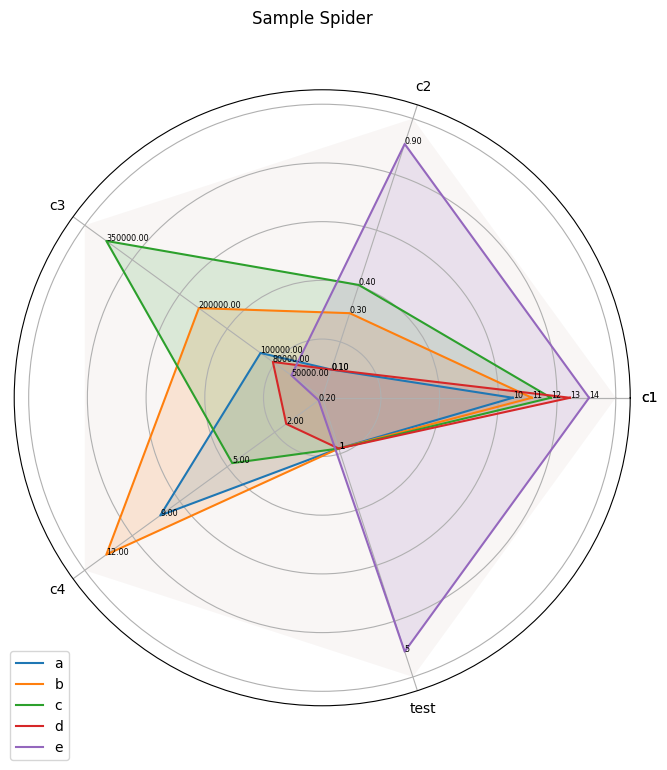

In [9]:
import pandas as pd

spider(
    pd.DataFrame(
        {
            "x": [*"abcde"],
            "c1": [10, 11, 12, 13, 14],
            "c2": [0.1, 0.3, 0.4, 0.1, 0.9],
            "c3": [1e5, 2e5, 3.5e5, 8e4, 5e4],
            "c4": [9, 12, 5, 2, 0.2],
            "test": [1, 1, 1, 1, 5],
        },
        index=[*"abcde"],
    ),
    title="Sample Spider",
    padding=1.1,
)

In [10]:
# | export
# Top-level altair configuration
def upsetaltair_top_level_configuration(
    base, legend_orient="top-left", legend_symbol_size=30
):
    """
    Configure the top-level settings for an UpSet plot in Altair.

    Parameters:
    - base: The base chart to configure.
    - legend_orient: The orientation of the legend. Default is "top-left".
    - legend_symbol_size: The size of the legend symbols. Default is 30.

    Returns:
    - The configured chart.

    """
    return (
        base.configure_view(stroke=None)
        .configure_title(
            fontSize=18, fontWeight=400, anchor="start", subtitlePadding=10
        )
        .configure_axis(
            labelFontSize=14,
            labelFontWeight=300,
            titleFontSize=16,
            titleFontWeight=400,
            titlePadding=10,
        )
        .configure_legend(
            titleFontSize=16,
            titleFontWeight=400,
            labelFontSize=14,
            labelFontWeight=300,
            padding=20,
            orient=legend_orient,
            symbolType="circle",
            symbolSize=legend_symbol_size,
        )
        .configure_concat(spacing=0)
    )


def UpSetAltair(
    data=None,
    title="",
    subtitle="",
    sets=None,
    abbre=None,
    sort_by="frequency",
    sort_order="ascending",
    width=1200,
    height=700,
    height_ratio=0.6,
    horizontal_bar_chart_width=300,
    color_range=["#55A8DB", "#3070B5", "#30363F", "#F1AD60", "#DF6234", "#BDC6CA"],
    highlight_color="#EA4667",
    glyph_size=200,
    set_label_bg_size=1000,
    line_connection_size=2,
    horizontal_bar_size=20,
    vertical_bar_label_size=16,
    vertical_bar_padding=20,
):
    """This function generates Altair-based interactive UpSet plots.

    Parameters:
        - data (pandas.DataFrame): Tabular data containing the membership of each element (row) in
            exclusive intersecting sets (column).
        - sets (list): List of set names of interest to show in the UpSet plots.
            This list reflects the order of sets to be shown in the plots as well.
        - abbre (list): Abbreviated set names.
        - sort_by (str): "frequency" or "degree"
        - sort_order (str): "ascending" or "descending"
        - width (int): Vertical size of the UpSet plot.
        - height (int): Horizontal size of the UpSet plot.
        - height_ratio (float): Ratio of height between upper and under views, ranges from 0 to 1.
        - horizontal_bar_chart_width (int): Width of horizontal bar chart on the bottom-right.
        - color_range (list): Color to encode sets.
        - highlight_color (str): Color to encode intersecting sets upon mouse hover.
        - glyph_size (int): Size of UpSet glyph (⬤).
        - set_label_bg_size (int): Size of label background in the horizontal bar chart.
        - line_connection_size (int): width of lines in matrix view.
        - horizontal_bar_size (int): Height of bars in the horizontal bar chart.
        - vertical_bar_label_size (int): Font size of texts in the vertical bar chart on the top.
        - vertical_bar_padding (int): Gap between a pair of bars in the vertical bar charts.
    """

    if (data is None) or (sets is None):
        print("No data and/or a list of sets are provided")
        return
    if (height_ratio < 0) or (1 < height_ratio):
        print("height_ratio set to 0.5")
        height_ratio = 0.5
    if len(sets) != len(abbre):
        abbre = None
        print(
            "Dropping the `abbre` list because the lengths of `sets` and `abbre` are not identical."
        )

    """
    Data Preprocessing
    """
    data["count"] = 0
    data = data[sets + ["count"]]
    data = data.groupby(sets).count().reset_index()

    data["intersection_id"] = data.index
    data["degree"] = data[sets].sum(axis=1)
    data = data.sort_values(
        by=["count"], ascending=True if sort_order == "ascending" else False
    )

    data = pd.melt(data, id_vars=["intersection_id", "count", "degree"])
    data = data.rename(columns={"variable": "set", "value": "is_intersect"})

    if abbre == None:
        abbre = sets

    set_to_abbre = pd.DataFrame(
        [[sets[i], abbre[i]] for i in range(len(sets))], columns=["set", "set_abbre"]
    )
    set_to_order = pd.DataFrame(
        [[sets[i], 1 + sets.index(sets[i])] for i in range(len(sets))],
        columns=["set", "set_order"],
    )

    degree_calculation = ""
    for s in sets:
        degree_calculation += f"(isDefined(datum['{s}']) ? datum['{s}'] : 0)"
        if sets[-1] != s:
            degree_calculation += "+"

    """
    Selections
    """
    legend_selection = alt.selection_multi(fields=["set"], bind="legend")
    color_selection = alt.selection_single(fields=["intersection_id"], on="mouseover")
    opacity_selection = alt.selection_single(fields=["intersection_id"])

    """
    Styles
    """
    vertical_bar_chart_height = height * height_ratio
    matrix_height = height - vertical_bar_chart_height
    matrix_width = width - horizontal_bar_chart_width

    vertical_bar_size = min(
        30,
        width / len(data["intersection_id"].unique().tolist()) - vertical_bar_padding,
    )

    main_color = "#3A3A3A"
    brush_opacity = alt.condition(~opacity_selection, alt.value(1), alt.value(0.6))
    brush_color = alt.condition(
        ~color_selection, alt.value(main_color), alt.value(highlight_color)
    )

    is_show_horizontal_bar_label_bg = len(abbre[0]) <= 2
    horizontal_bar_label_bg_color = (
        "white" if is_show_horizontal_bar_label_bg else "black"
    )

    x_sort = alt.Sort(
        field="count" if sort_by == "frequency" else "degree", order=sort_order
    )
    tooltip = [
        alt.Tooltip("max(count):Q", title="Cardinality"),
        alt.Tooltip("degree:Q", title="Degree"),
    ]

    """
    Plots
    """
    # To use native interactivity in Altair, we are using the data transformation functions
    # supported in Altair.
    base = (
        alt.Chart(data)
        .transform_filter(legend_selection)
        .transform_pivot(
            # Right before this operation, columns should be:
            # `count`, `set`, `is_intersect`, (`intersection_id`, `degree`, `set_order`, `set_abbre`)
            # where (fields with brackets) should be dropped and recalculated later.
            "set",
            op="max",
            groupby=["intersection_id", "count"],
            value="is_intersect",
        )
        .transform_aggregate(
            # count, set1, set2, ...
            count="sum(count)",
            groupby=sets,
        )
        .transform_calculate(
            # count, set1, set2, ...
            degree=degree_calculation
        )
        .transform_filter(
            # count, set1, set2, ..., degree
            alt.datum["degree"]
            != 0
        )
        .transform_window(
            # count, set1, set2, ..., degree
            intersection_id="row_number()",
            frame=[None, None],
        )
        .transform_fold(
            # count, set1, set2, ..., degree, intersection_id
            sets,
            as_=["set", "is_intersect"],
        )
        .transform_lookup(
            # count, set, is_intersect, degree, intersection_id
            lookup="set",
            from_=alt.LookupData(set_to_abbre, "set", ["set_abbre"]),
        )
        .transform_lookup(
            # count, set, is_intersect, degree, intersection_id, set_abbre
            lookup="set",
            from_=alt.LookupData(set_to_order, "set", ["set_order"]),
        )
        .transform_filter(
            # Make sure to remove the filtered sets.
            legend_selection
        )
        .transform_window(
            # count, set, is_intersect, degree, intersection_id, set_abbre
            set_order="distinct(set)",
            frame=[None, 0],
            sort=[{"field": "set_order"}],
        )
    )
    # Now, we have data in the following format:
    # count, set, is_intersect, degree, intersection_id, set_abbre

    # Cardinality by intersecting sets (vertical bar chart)
    vertical_bar = (
        base.mark_bar(color=main_color, size=vertical_bar_size)
        .encode(
            x=alt.X(
                "intersection_id:N",
                axis=alt.Axis(grid=False, labels=False, ticks=False, domain=True),
                sort=x_sort,
                title=None,
            ),
            y=alt.Y(
                "max(count):Q",
                axis=alt.Axis(grid=False, tickCount=3, orient="right"),
                title="Intersection Size",
            ),
            color=brush_color,
            tooltip=tooltip,
        )
        .properties(width=matrix_width, height=vertical_bar_chart_height)
    )

    vertical_bar_text = vertical_bar.mark_text(
        color=main_color, dy=-10, size=vertical_bar_label_size
    ).encode(text=alt.Text("count:Q", format=".0f"))

    vertical_bar_chart = (vertical_bar + vertical_bar_text).add_selection(
        color_selection
    )

    # UpSet glyph view (matrix view)
    circle_bg = (
        vertical_bar.mark_circle(size=glyph_size, opacity=1)
        .encode(
            x=alt.X(
                "intersection_id:N",
                axis=alt.Axis(grid=False, labels=False, ticks=False, domain=False),
                sort=x_sort,
                title=None,
            ),
            y=alt.Y(
                "set_order:N",
                axis=alt.Axis(grid=False, labels=False, ticks=False, domain=False),
                title=None,
            ),
            color=alt.value("#E6E6E6"),
        )
        .properties(height=matrix_height)
    )

    rect_bg = (
        circle_bg.mark_rect()
        .transform_filter(alt.datum["set_order"] % 2 == 1)
        .encode(color=alt.value("#F7F7F7"))
    )

    circle = circle_bg.transform_filter(alt.datum["is_intersect"] == 1).encode(
        color=brush_color
    )

    line_connection = (
        vertical_bar.mark_bar(size=line_connection_size, color=main_color)
        .transform_filter(alt.datum["is_intersect"] == 1)
        .encode(y=alt.Y("min(set_order):N"), y2=alt.Y2("max(set_order):N"))
    )

    matrix_view = (
        circle + rect_bg + circle_bg + line_connection + circle
    ).add_selection(
        # Duplicate `circle` is to properly show tooltips.
        color_selection
    )

    # Cardinality by sets (horizontal bar chart)
    horizontal_bar_label_bg = base.mark_circle(size=set_label_bg_size).encode(
        y=alt.Y(
            "set_order:N",
            axis=alt.Axis(grid=False, labels=False, ticks=False, domain=False),
            title=None,
        ),
        color=alt.Color(
            "set:N", scale=alt.Scale(domain=sets, range=color_range), title=None
        ),
        opacity=alt.value(1),
    )
    horizontal_bar_label = horizontal_bar_label_bg.mark_text(
        align=("center" if is_show_horizontal_bar_label_bg else "center")
    ).encode(
        text=alt.Text("set_abbre:N"), color=alt.value(horizontal_bar_label_bg_color)
    )
    horizontal_bar_axis = (
        (horizontal_bar_label_bg + horizontal_bar_label)
        if is_show_horizontal_bar_label_bg
        else horizontal_bar_label
    )

    horizontal_bar = (
        horizontal_bar_label_bg.mark_bar(size=horizontal_bar_size)
        .transform_filter(alt.datum["is_intersect"] == 1)
        .encode(
            x=alt.X(
                "sum(count):Q", axis=alt.Axis(grid=False, tickCount=3), title="Set Size"
            )
        )
        .properties(width=horizontal_bar_chart_width)
    )

    # Concat Plots
    upsetaltair = alt.vconcat(
        vertical_bar_chart,
        alt.hconcat(
            matrix_view,
            horizontal_bar_axis,
            horizontal_bar,  # horizontal bar chart
            spacing=5,
        ).resolve_scale(y="shared"),
        spacing=20,
    ).add_selection(legend_selection)

    # Apply top-level configuration
    upsetaltair = upsetaltair_top_level_configuration(
        upsetaltair, legend_orient="top", legend_symbol_size=set_label_bg_size / 2.0
    ).properties(
        title={
            "text": title,
            "subtitle": subtitle,
            "fontSize": 20,
            "fontWeight": 500,
            "subtitleColor": main_color,
            "subtitleFontSize": 14,
        }
    )

    return upsetaltair

In [11]:
df

,truth,pred
0,c,d
1,c,c
2,d,d
3,c,a
4,d,c
...,...,...
995,c,c
996,a,c
997,b,a
998,b,c


In [12]:
import numpy as np

df = pd.DataFrame(np.random.randn(300, 7) > 0.33).astype(int)
df.columns = [rand() for _ in range(len(df.columns))]
# df['id'] = [rand() for _ in range(len(df))]
df
UpSetAltair(
    df,
    sets=list(df.columns),
    abbre=list(df.columns),
    sort_by="frequencey",
    sort_order="ascending",
)

/Users/yeshwanth.y/miniconda3/envs/mdm/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/yeshwanth.y/miniconda3/envs/mdm/lib/python3.8/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


RuntimeError: The pyarrow package must be version 11.0.0 or greater. Found version 10.0.1